# Titanic Survival Prediction

<center><img src="https://raw.githubusercontent.com/Masterx-AI/Project_Titanic_Survival_Prediction_/main/titanic.jpg" style="width: 600px;"/>

## Description:
The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we were asked to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

## Objective:
+ Understand the Dataset & cleanup (if required).
+ Build classification model to predict weather the passenger survives or not.
+ Also fine-tune the hyperparameters & compare the evaluation metrics of various classification algorithms

## Strategic Plan of Action:
**We aim to solve the problem statement by creating a plan of action, Here are some of the necessary steps:**

+ Data Exploration
+ Exploratory Data Analysis (EDA)
+ Data Pre-processing
+ Data Manipulation
+ Models
+ Project Outcomes & Conclusion

### 1. Data Exploration

In [1]:
#Importing the basic librarires

In [2]:
import os
import math
import scipy
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import tree
from scipy.stats import randint
from scipy.stats import loguniform
from IPython.display import display

from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier



from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, \
f1_score, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

import warnings 
warnings.filterwarnings('ignore')

In [3]:
#Importing the dataset
data = pd.read_csv('Titanic-Dataset.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Columns or Features Description**
+ PassengerId: A unique identifier assigned to each passenger.
+ Survived: Indicates whether a passenger survived (1) or died (0).
+ Pclass: Represents the passenger class, which can be a numerical or categorical value indicating the class of travel (e.g., first, second, or third class).
+ Name: The name of the passenger.
+ Sex: Represents the gender of the passenger, typically categorized as male or female.
+ Age: The age of the passenger, often represented as a numerical value.
+ SibSp: Indicates the number of siblings or spouses traveling with the passenger.
+ Parch: Represents the number of parents or children traveling with the passenger.
+ Ticket: The ticket number associated with the passenger's ticket.
+ Fare: The amount of money spent on the ticket.
+ Cabin: Represents the cabin category or number assigned to the passenger, if available.
+ Embarked: Indicates the port where the passenger embarked from, typically represented by a single character code (e.g., C for Cherbourg, Q for Queenstown, S for Southampton).

In [5]:
data.shape

(891, 12)

**Inference:** The Datset consists of 12 features & 891 samples.

**PassengerId,Name,Ticket and Cabin columns are not needed for training. Remove columns.**

In [6]:
data.drop(['PassengerId','Name','Ticket','Cabin'],axis=1, inplace=True)

In [7]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [8]:
target = 'Survived'
labels = ['Not-Survived','Survived']
features = [i for i in data.columns.values if i not in [target]]

original_data = data.copy(deep=True)
display(data.head())


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**Inference:** Now the Datset consists of 8 features & 891 samples.

In [9]:
#Checking the dtypes of all the columns

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


**Inference:** The Datset has 6 numerical & 2 categorical features.

In [10]:
#Checking number of unique rows in each feature

data.nunique().sort_values()

Survived      2
Sex           2
Pclass        3
Embarked      3
SibSp         7
Parch         7
Age          88
Fare        248
dtype: int64

In [11]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

**Inference:** The Age and Embarked has some null values

In [12]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Inference:** The stats seem to be fine, let us gain more undestanding by visualising the dataset.

### 2. Exploratory Data Analysis (EDA)

In [13]:
sex_counts=data['Sex'].value_counts()
sex_counts

male      577
female    314
Name: Sex, dtype: int64

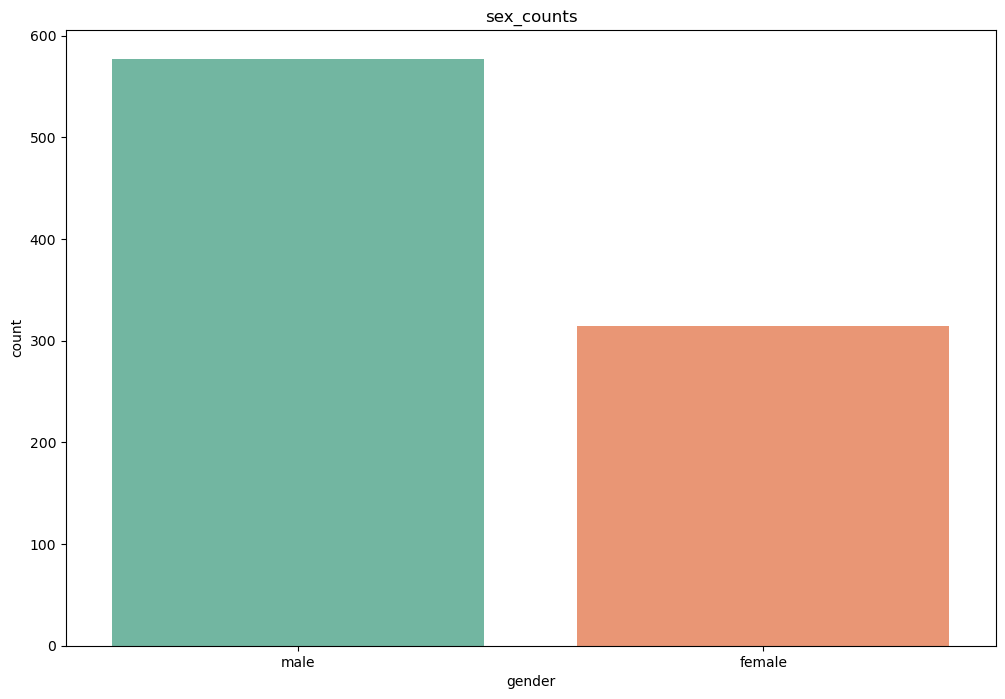

In [14]:
plt.figure(figsize=(12,8))
sns.barplot(x=sex_counts.index,y=sex_counts.values,palette='Set2')
plt.title('sex_counts')
plt.xlabel('gender')
plt.ylabel('count')
plt.show()

**Inference:** Males are more than Female

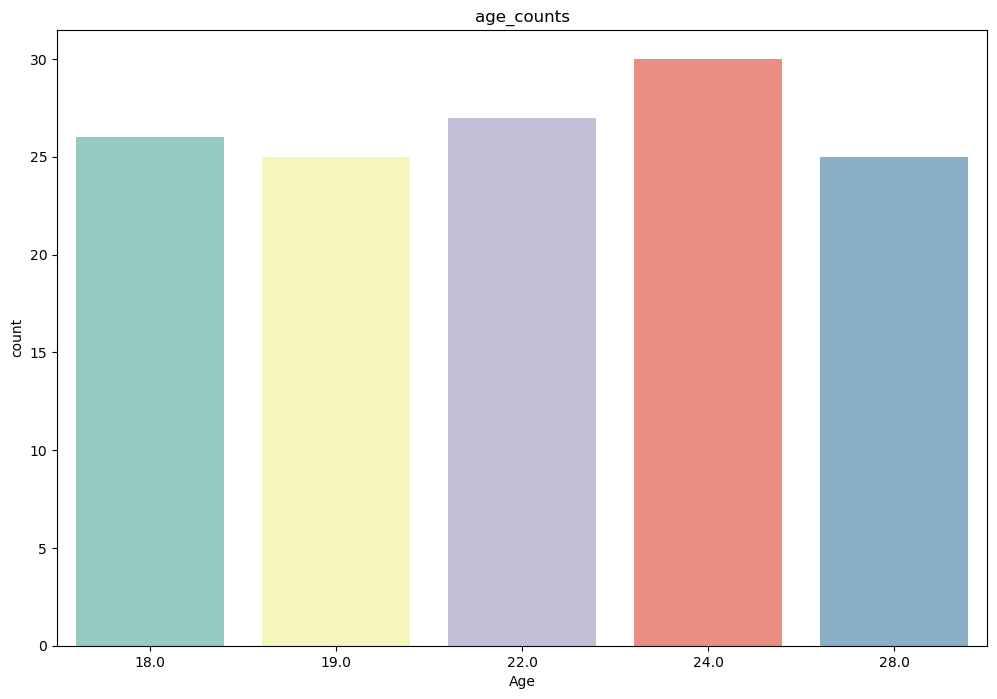

24.0    30
22.0    27
18.0    26
19.0    25
28.0    25
Name: Age, dtype: int64

In [15]:
#the most 5 age in data
age_counts=data['Age'].value_counts().head()

plt.figure(figsize=(12,8))
sns.barplot(x=age_counts.index,y=age_counts.values,palette='Set3')
plt.title('age_counts')
plt.xlabel('Age')
plt.ylabel('count')
plt.show()
age_counts

**Inference:** Most people are of age group 24 with max count of 30

In [16]:
pclass_counts=data['Pclass'].value_counts()
pclass_counts

3    491
1    216
2    184
Name: Pclass, dtype: int64

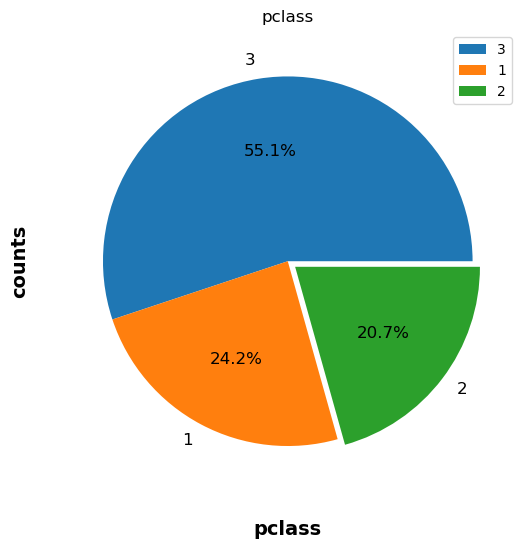

In [17]:
plt.figure(figsize = (20, 6))
explode = (0,0,0.05)
pclass_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('pclass')
plt.xlabel('pclass', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = pclass_counts.index, loc = "best")
plt.show()

**Inference:** Most people are of pclass 3

In [18]:
SibSp_counts=data['SibSp'].value_counts()
SibSp_counts

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

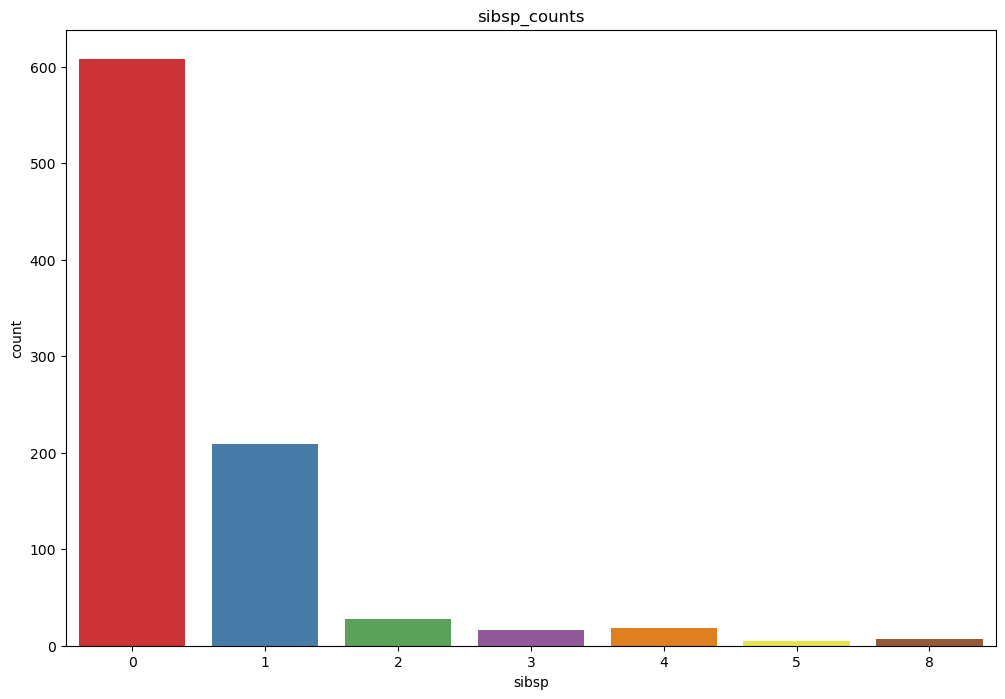

In [19]:
plt.figure(figsize=(12,8))
sns.barplot(x=SibSp_counts.index,y=SibSp_counts.values,palette='Set1')
plt.title('sibsp_counts')
plt.xlabel('sibsp')
plt.ylabel('count')
plt.show()

**Inference:** Most people are travelling without any siblings or spouses

In [20]:
Parch_counts=data['Parch'].value_counts()
Parch_counts

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

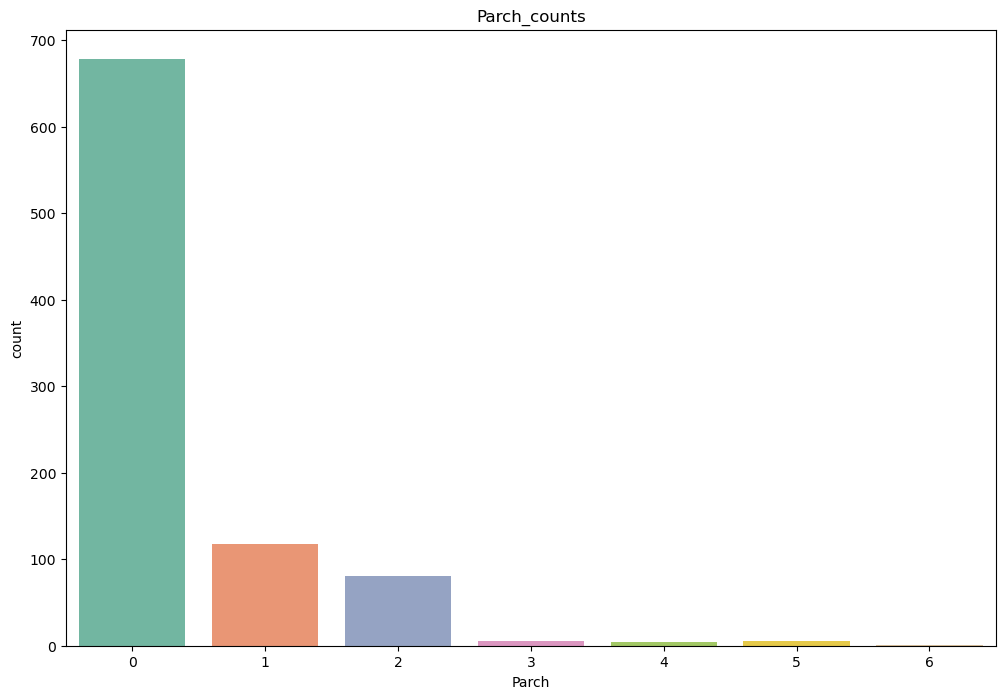

In [21]:
plt.figure(figsize=(12,8))
sns.barplot(x=Parch_counts.index,y=Parch_counts.values,palette='Set2')
plt.title('Parch_counts')
plt.xlabel('Parch')
plt.ylabel('count')
plt.show()

**Inference:** Most people parched alone

In [22]:
Embarked_counts=data['Embarked'].value_counts()
Embarked_counts

S    644
C    168
Q     77
Name: Embarked, dtype: int64

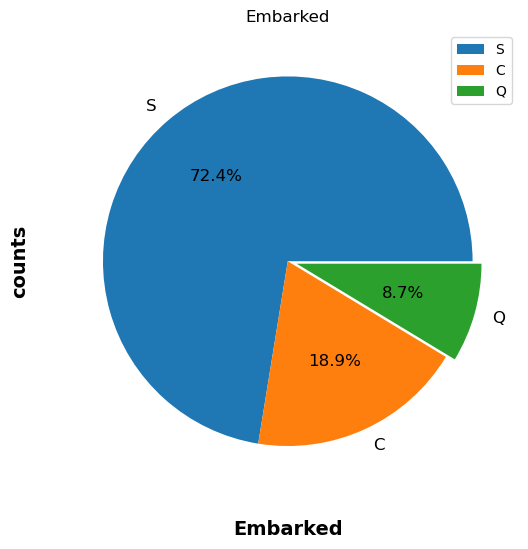

In [23]:
plt.figure(figsize = (20, 6))
explode = (0,0,0.05)
Embarked_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('Embarked')
plt.xlabel('Embarked', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = Embarked_counts.index, loc = "best")
plt.show()

**Inference:** Majority of the people embarked from Southampton.

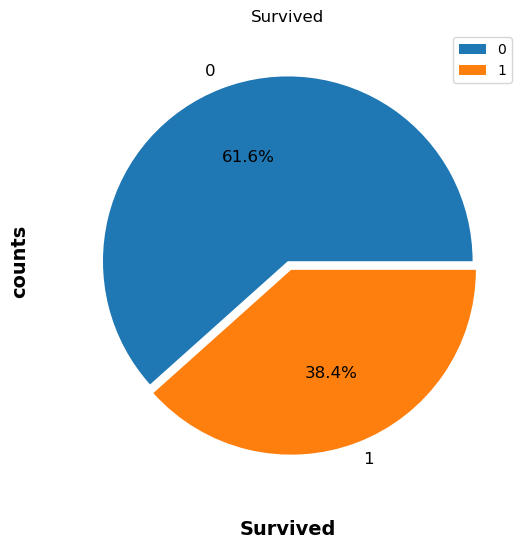

In [24]:
Survived_counts=data['Survived'].value_counts()
Survived_counts

plt.figure(figsize = (20, 6))
explode = (0,0.05)
Survived_counts.plot(kind = 'pie', fontsize = 12, explode = explode, autopct = '%.1f%%')
plt.title('Survived')
plt.xlabel('Survived', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.ylabel('counts', weight = "bold", color = "#000000", fontsize = 14, labelpad = 20)
plt.legend(labels = Survived_counts.index, loc = "best")
plt.show()

**Inference:** 61.6% people do not survived

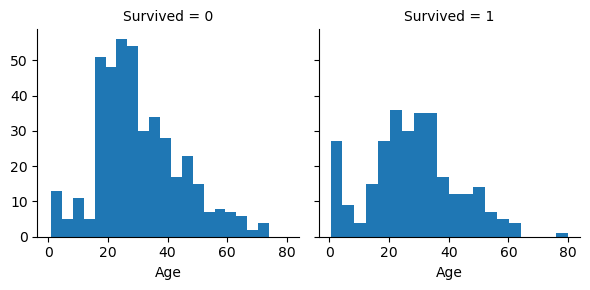

In [25]:
#visulize ages are survived or not
age=sns.FacetGrid(data,col='Survived')
age.map(plt.hist,'Age',bins=20)
plt.show()

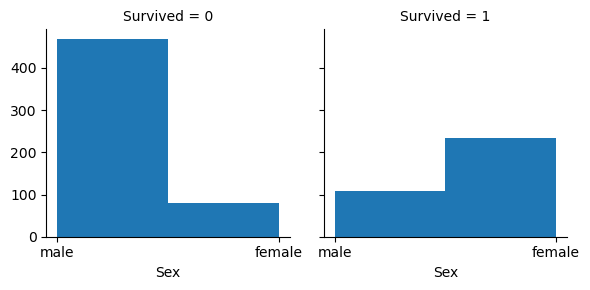

In [26]:
#visulize gender is survived or not
gender=sns.FacetGrid(data,col='Survived')

gender.map(plt.hist,'Sex',bins=2)
plt.show()

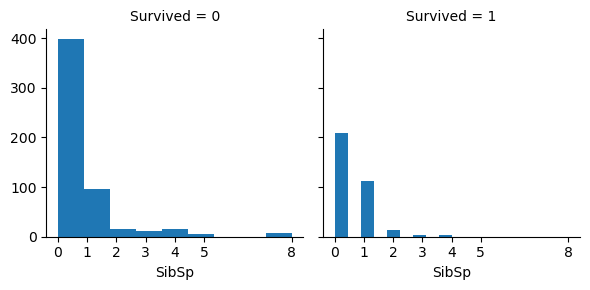

In [27]:
#visulize sibsp is survived or not
sibsp=sns.FacetGrid(data,col='Survived')
plt.xticks(SibSp_counts.index)
sibsp.map(plt.hist,'SibSp',bins=9)
plt.show()

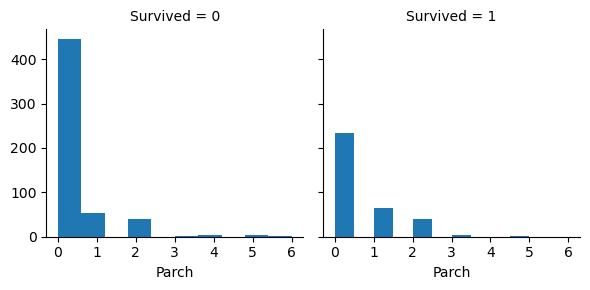

In [28]:
# visulize parch is survived or not
parch=sns.FacetGrid(data,col='Survived')
plt.xticks(Parch_counts.index)
parch.map(plt.hist,'Parch')
plt.show()

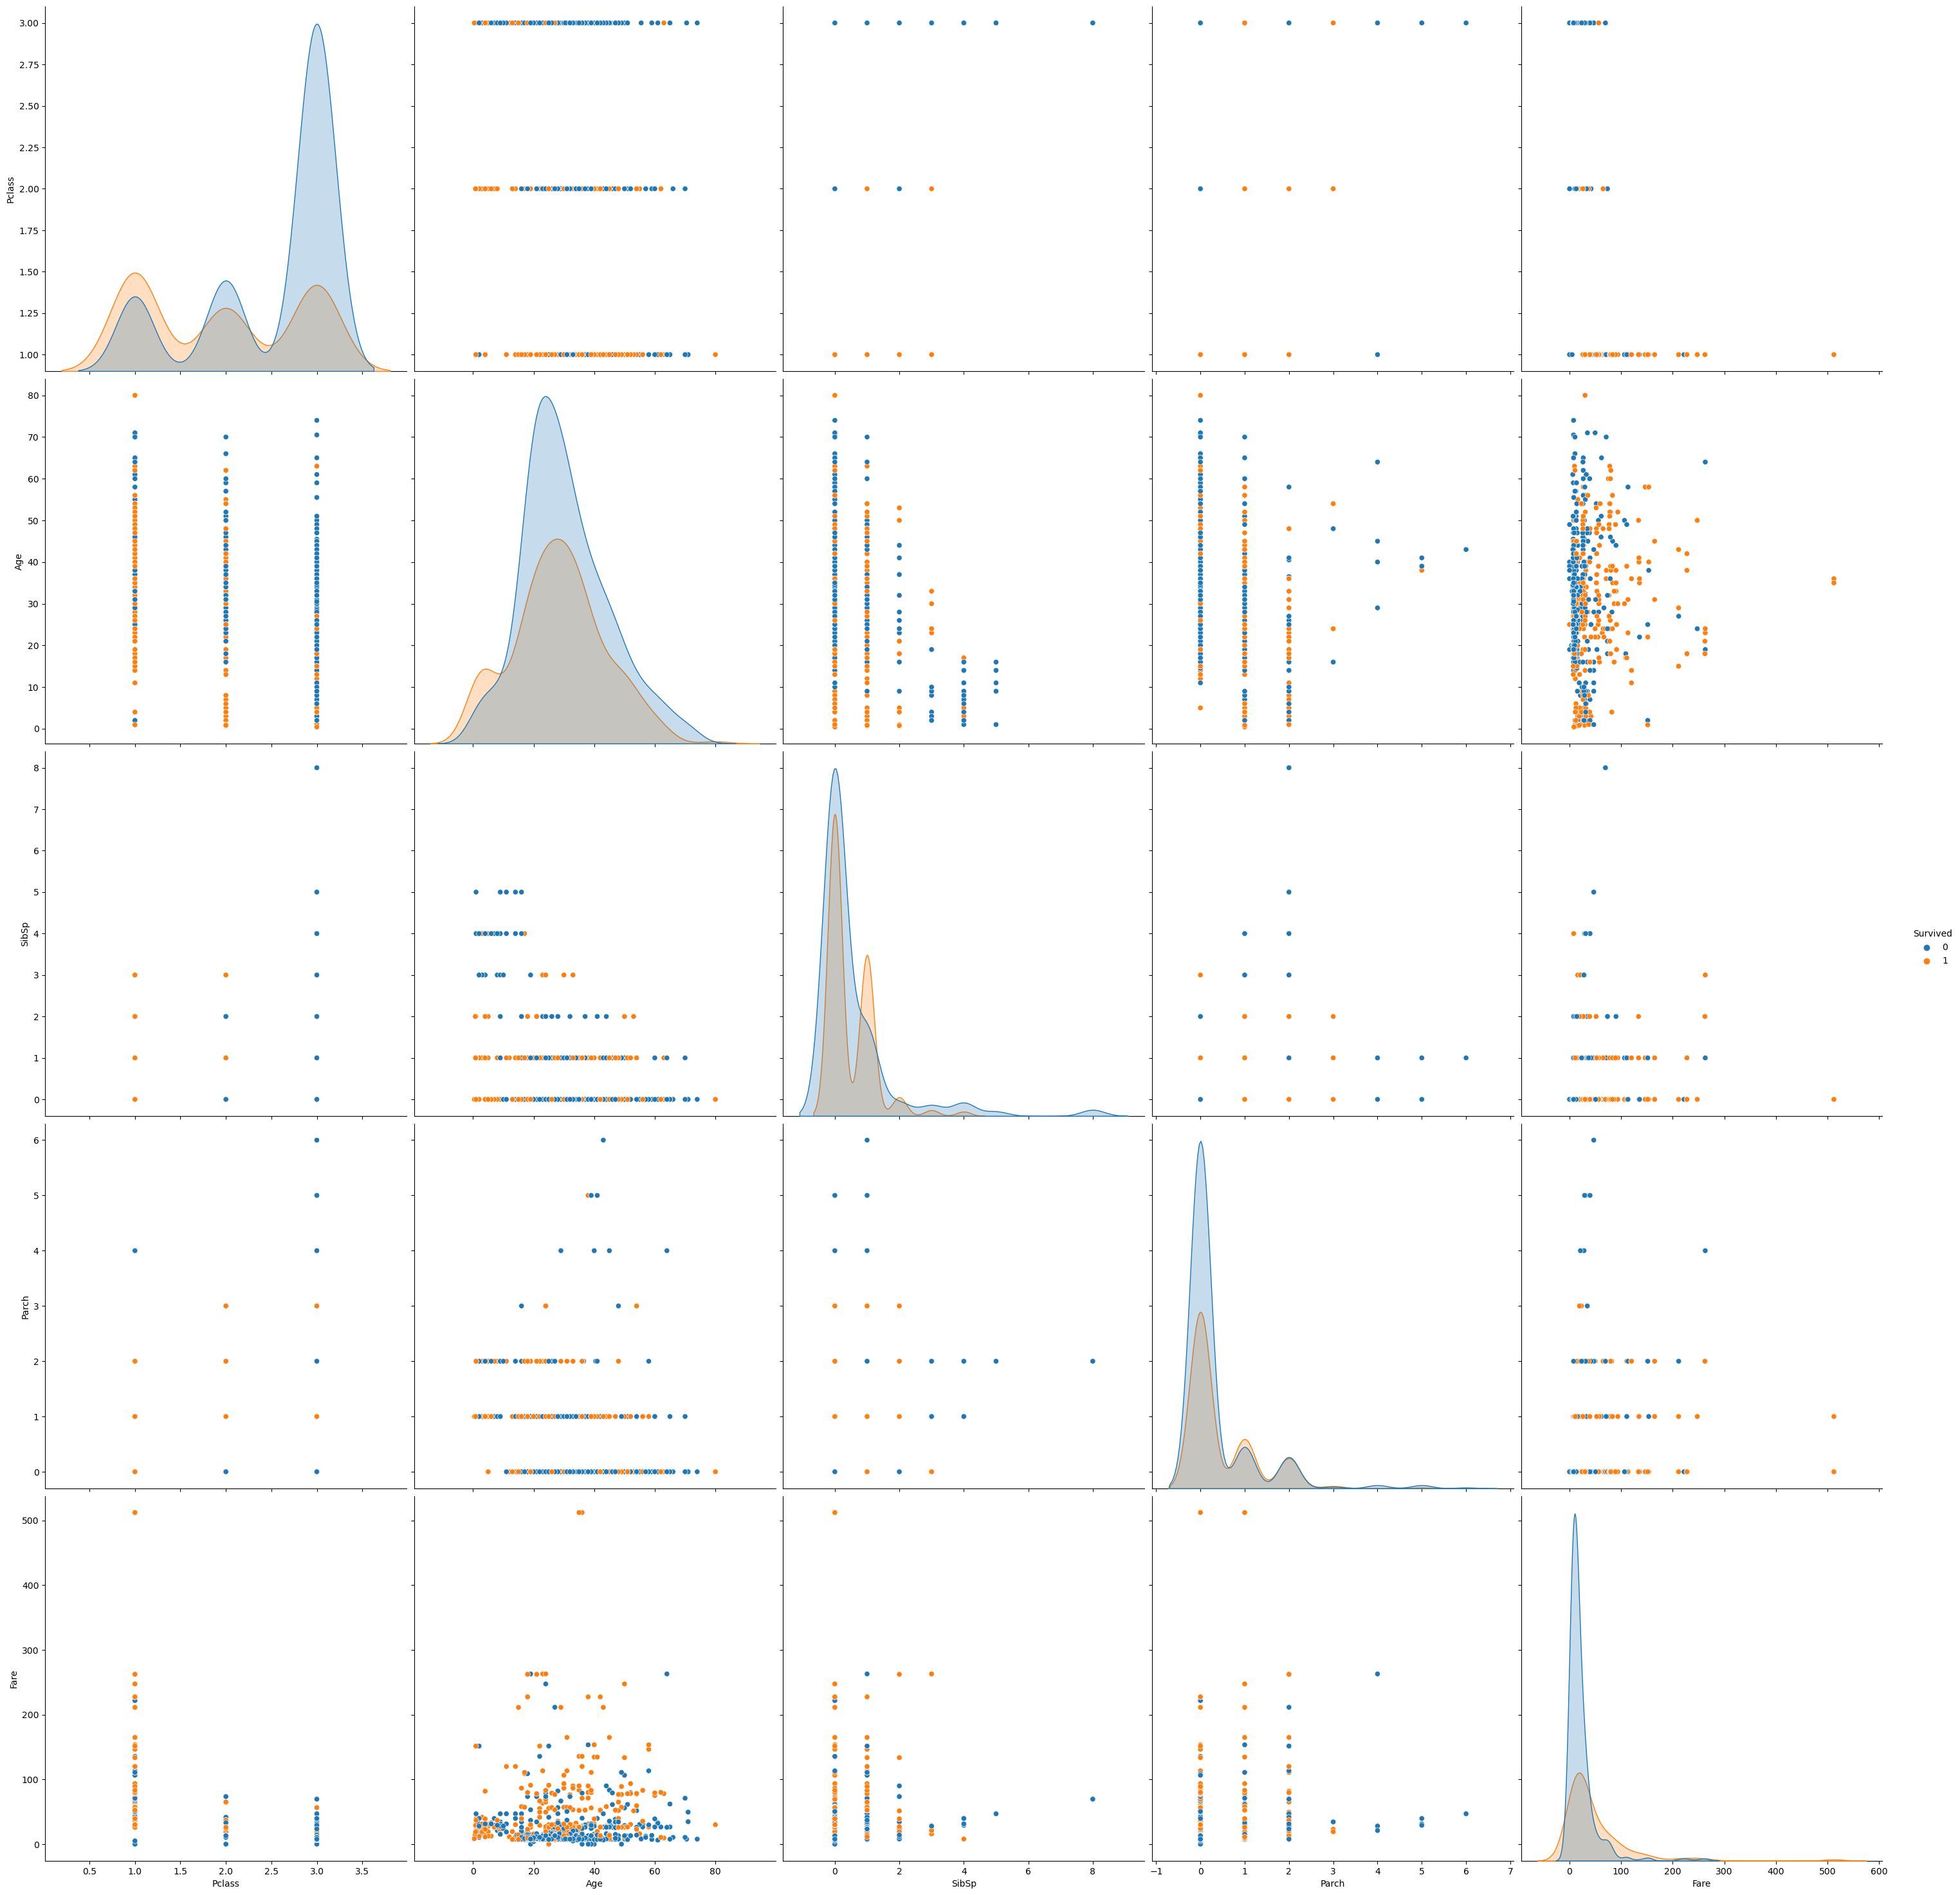

In [29]:
#Understanding the relationship between all the features
sns.pairplot(data, hue=target, size=6)
plt.show()

**Inference:** The data samples of most of the features do show some patterns. Also they seem to have lot of overlap for the outcome classes, making it difficult to be distingusihable. Let us proceed to perform cleanup on the data to remove the irregularities...

### 3. Data Preprocessing

+ we have missing values in column age by using statistical measures like mean, median, or regression models based on other available features.

+ For the 'Embarked' column, we could impute missing values with the most frequent value or use advanced techniques like regression models if there is a relationship with other features.

In [30]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [31]:
### convert the gender to binary 0 and 1
data['Sex']=data['Sex'].replace({'male':1,'female':0})
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [32]:
# Fill missing values in age column by imputing the median
data['Age'].fillna(data['Age'].median(), inplace=True)
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [33]:
# Fill missing values in embarked column by imputing the mode
data["Embarked"].fillna(data["Embarked"].mode()[0], inplace=True)
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [34]:
### convert the embarked and assign S:1,C:2,Q:3
data['Embarked']=data['Embarked'].replace({'S':1,'C':2,'Q':3})
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,1
1,1,1,0,38.0,1,0,71.2833,2
2,1,3,0,26.0,0,0,7.9250,1
3,1,1,0,35.0,1,0,53.1000,1
4,0,3,1,35.0,0,0,8.0500,1


In [35]:
data.shape

(891, 8)

In [36]:
cr = data.corr()

In [37]:
cr

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.064910,-0.035322,0.081629,0.257307,0.106811
Pclass,-0.338481,1.000000,0.131900,-0.339898,0.083081,0.018443,-0.549500,0.045702
Sex,-0.543351,0.131900,1.000000,0.081163,-0.114631,-0.245489,-0.182333,-0.116569
Age,-0.064910,-0.339898,0.081163,1.000000,-0.233296,-0.172482,0.096688,-0.009165
SibSp,-0.035322,0.083081,-0.114631,-0.233296,1.000000,0.414838,0.159651,-0.059961
Parch,0.081629,0.018443,-0.245489,-0.172482,0.414838,1.000000,0.216225,-0.078665
Fare,0.257307,-0.549500,-0.182333,0.096688,0.159651,0.216225,1.000000,0.062142
Embarked,0.106811,0.045702,-0.116569,-0.009165,-0.059961,-0.078665,0.062142,1.000000


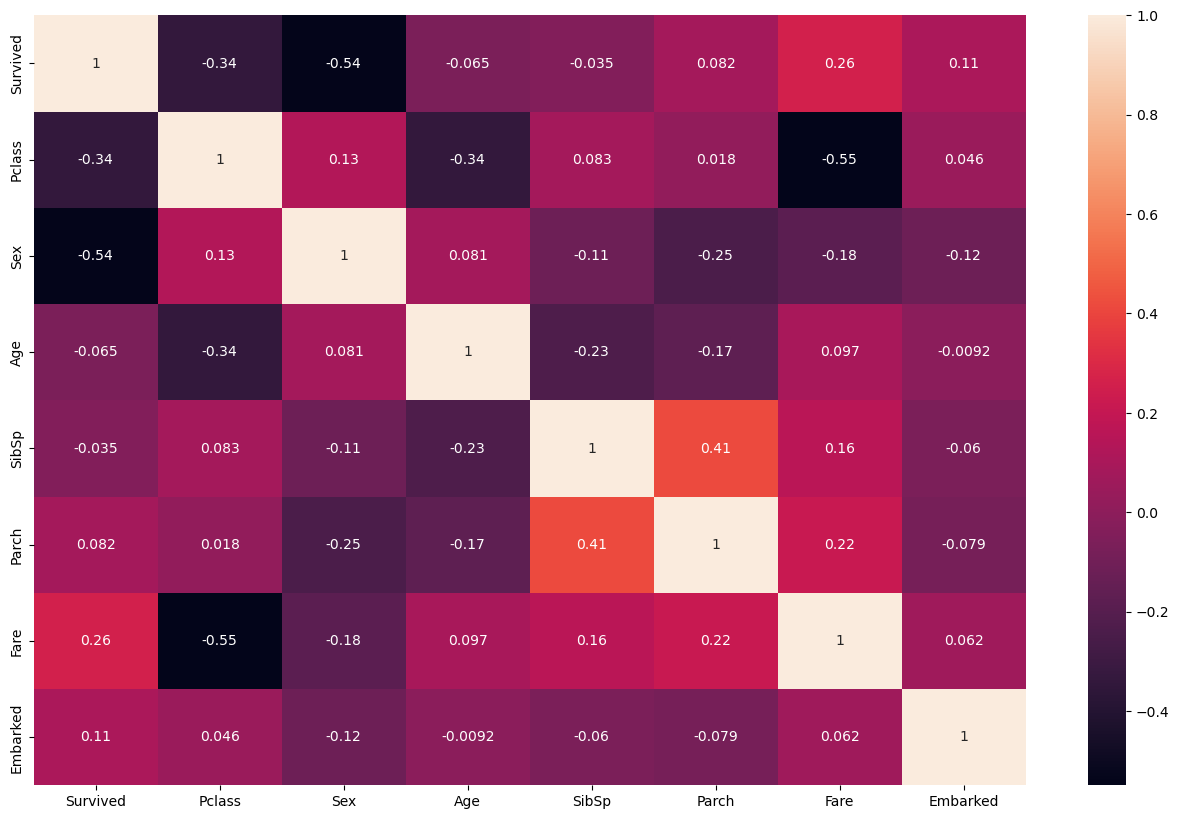

In [38]:
plt.figure(figsize=(16, 10))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [39]:
data.shape

(891, 8)

### 4. Data Manipulation

In [40]:
#Splitting the data intro training & testing sets
X=data.drop(columns=['Survived'])
Y=data['Survived']

In [41]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,1
1,1,0,38.0,1,0,71.2833,2
2,3,0,26.0,0,0,7.9250,1
3,1,0,35.0,1,0,53.1000,1
4,3,1,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,13.0000,1
887,1,0,19.0,0,0,30.0000,1
888,3,0,28.0,1,2,23.4500,1
889,1,1,26.0,0,0,30.0000,2


In [42]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [43]:
# Scaling the X data
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [44]:
X

array([[1.        , 1.        , 0.27117366, ..., 0.        , 0.01415106,
        0.        ],
       [0.        , 0.        , 0.4722292 , ..., 0.        , 0.13913574,
        0.5       ],
       [1.        , 0.        , 0.32143755, ..., 0.        , 0.01546857,
        0.        ],
       ...,
       [1.        , 0.        , 0.34656949, ..., 0.33333333, 0.04577135,
        0.        ],
       [0.        , 1.        , 0.32143755, ..., 0.        , 0.0585561 ,
        0.5       ],
       [1.        , 1.        , 0.39683338, ..., 0.        , 0.01512699,
        1.        ]])

In [45]:
# Reshape Y
Y=Y.values.reshape(-1,1)

In [46]:
Y

array([[0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
    

In [47]:
# train test split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=42)

### 5. Models

#### 1-Logistic Regression

In [48]:
# Initialize Logistic Regression model
lr = LogisticRegression(penalty="l2",max_iter=1000,solver="lbfgs")

In [49]:
# Train the model
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [50]:
# Training Accuracy Score
train_accuracy_lr = accuracy_score(y_train, lr.predict(X_train))

# Cross Validation Score
cross_val_scores = cross_val_score(lr, X, Y, cv=5)
cross_val_score_avg_lr = np.average(cross_val_scores)

# Testing Accuracy Score
test_accuracy_lr = accuracy_score(y_test, lr.predict(X_test))

# Precision Score
precision_lr = precision_score(y_test, lr.predict(X_test), average='weighted')

# Recall Score
recall_lr = recall_score(y_test, lr.predict(X_test), average='weighted')

# F1-Score Score
f1_lr = f1_score(y_test, lr.predict(X_test), average='weighted')

# Confusion Matrix
cm_lr = confusion_matrix(y_test, lr.predict(X_test))

# Classification Report
cr_lr = classification_report(y_test, lr.predict(X_test))

In [51]:
# Display the metrics for Logistic Regression
print("Metrics for Logistic Regression:")
print(f"Training Accuracy Score: {train_accuracy_lr}")
print(f"Cross Validation Score: {cross_val_score_avg_lr}")
print(f"Testing Accuracy Score: {test_accuracy_lr}")
print(f"Precision Score: {precision_lr}")
print(f"Recall Score: {recall_lr}")
print(f"F1-Score: {f1_lr}")
print(f"Confusion Matrix:\n{cm_lr}")
print(f"Classification Report:\n{cr_lr}")

Metrics for Logistic Regression:
Training Accuracy Score: 0.8019662921348315
Cross Validation Score: 0.7833908731404181
Testing Accuracy Score: 0.7988826815642458
Precision Score: 0.7978301995719018
Recall Score: 0.7988826815642458
F1-Score: 0.7974270202218899
Confusion Matrix:
[[90 15]
 [21 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



[[90 15]
 [21 53]]


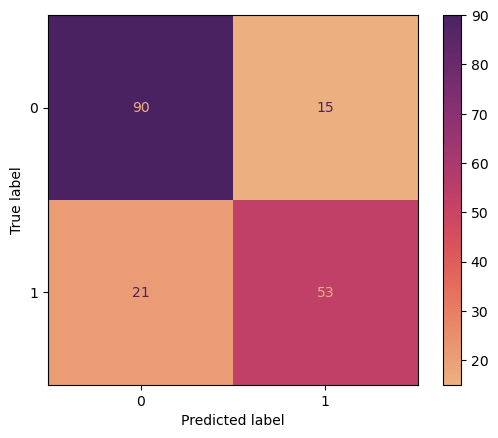

In [52]:
# Confusion Matrix 
ConfusionMatrixDisplay.from_predictions(y_test, lr.predict(X_test),cmap="flare")
print(cm_lr)


#### 2. DecisionTreeClassifier

In [53]:
# Initialize Decision Tree Classifier
dt = DecisionTreeClassifier()

In [54]:
# Train the model
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
# Training Accuracy Score
train_accuracy_dt = accuracy_score(y_train, dt.predict(X_train))

# Cross Validation Score
cross_val_scores = cross_val_score(dt, X, Y, cv=5)
cross_val_score_avg_dt = np.average(cross_val_scores)

# Testing Accuracy Score
test_accuracy_dt = accuracy_score(y_test, dt.predict(X_test))

# Precision Score
precision_dt = precision_score(y_test, dt.predict(X_test), average='weighted')

# Recall Score
recall_dt = recall_score(y_test, dt.predict(X_test), average='weighted')

# F1-Score Score
f1_dt = f1_score(y_test, dt.predict(X_test), average='weighted')

# Confusion Matrix
cm_dt = confusion_matrix(y_test, dt.predict(X_test))

# Classification Report
cr_dt = classification_report(y_test, dt.predict(X_test))

In [56]:
# Display the metrics for Decision Tree Classifier
print("Metrics for Decision Tree Classifier:")
print(f"Training Accuracy Score: {train_accuracy_dt}")
print(f"Cross Validation Score: {cross_val_score_avg_dt}")
print(f"Testing Accuracy Score: {test_accuracy_dt}")
print(f"Precision Score: {precision_dt}")
print(f"Recall Score: {recall_dt}")
print(f"F1-Score: {f1_dt}")
print(f"Confusion Matrix:\n{cm_dt}")
print(f"Classification Report:\n{cr_dt}")

Metrics for Decision Tree Classifier:
Training Accuracy Score: 0.9789325842696629
Cross Validation Score: 0.7766995166656205
Testing Accuracy Score: 0.776536312849162
Precision Score: 0.7757807016017219
Recall Score: 0.776536312849162
F1-Score: 0.7760598136454931
Confusion Matrix:
[[86 19]
 [21 53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       105
           1       0.74      0.72      0.73        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



[[86 19]
 [21 53]]


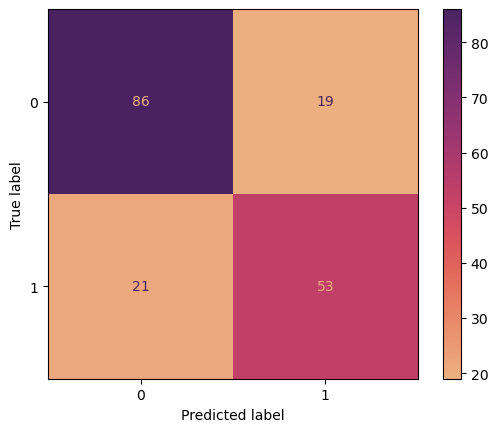

In [57]:
ConfusionMatrixDisplay.from_predictions(y_test, dt.predict(X_test),cmap="flare")
print(cm_dt)


Interpreting the output of Decision Tree:



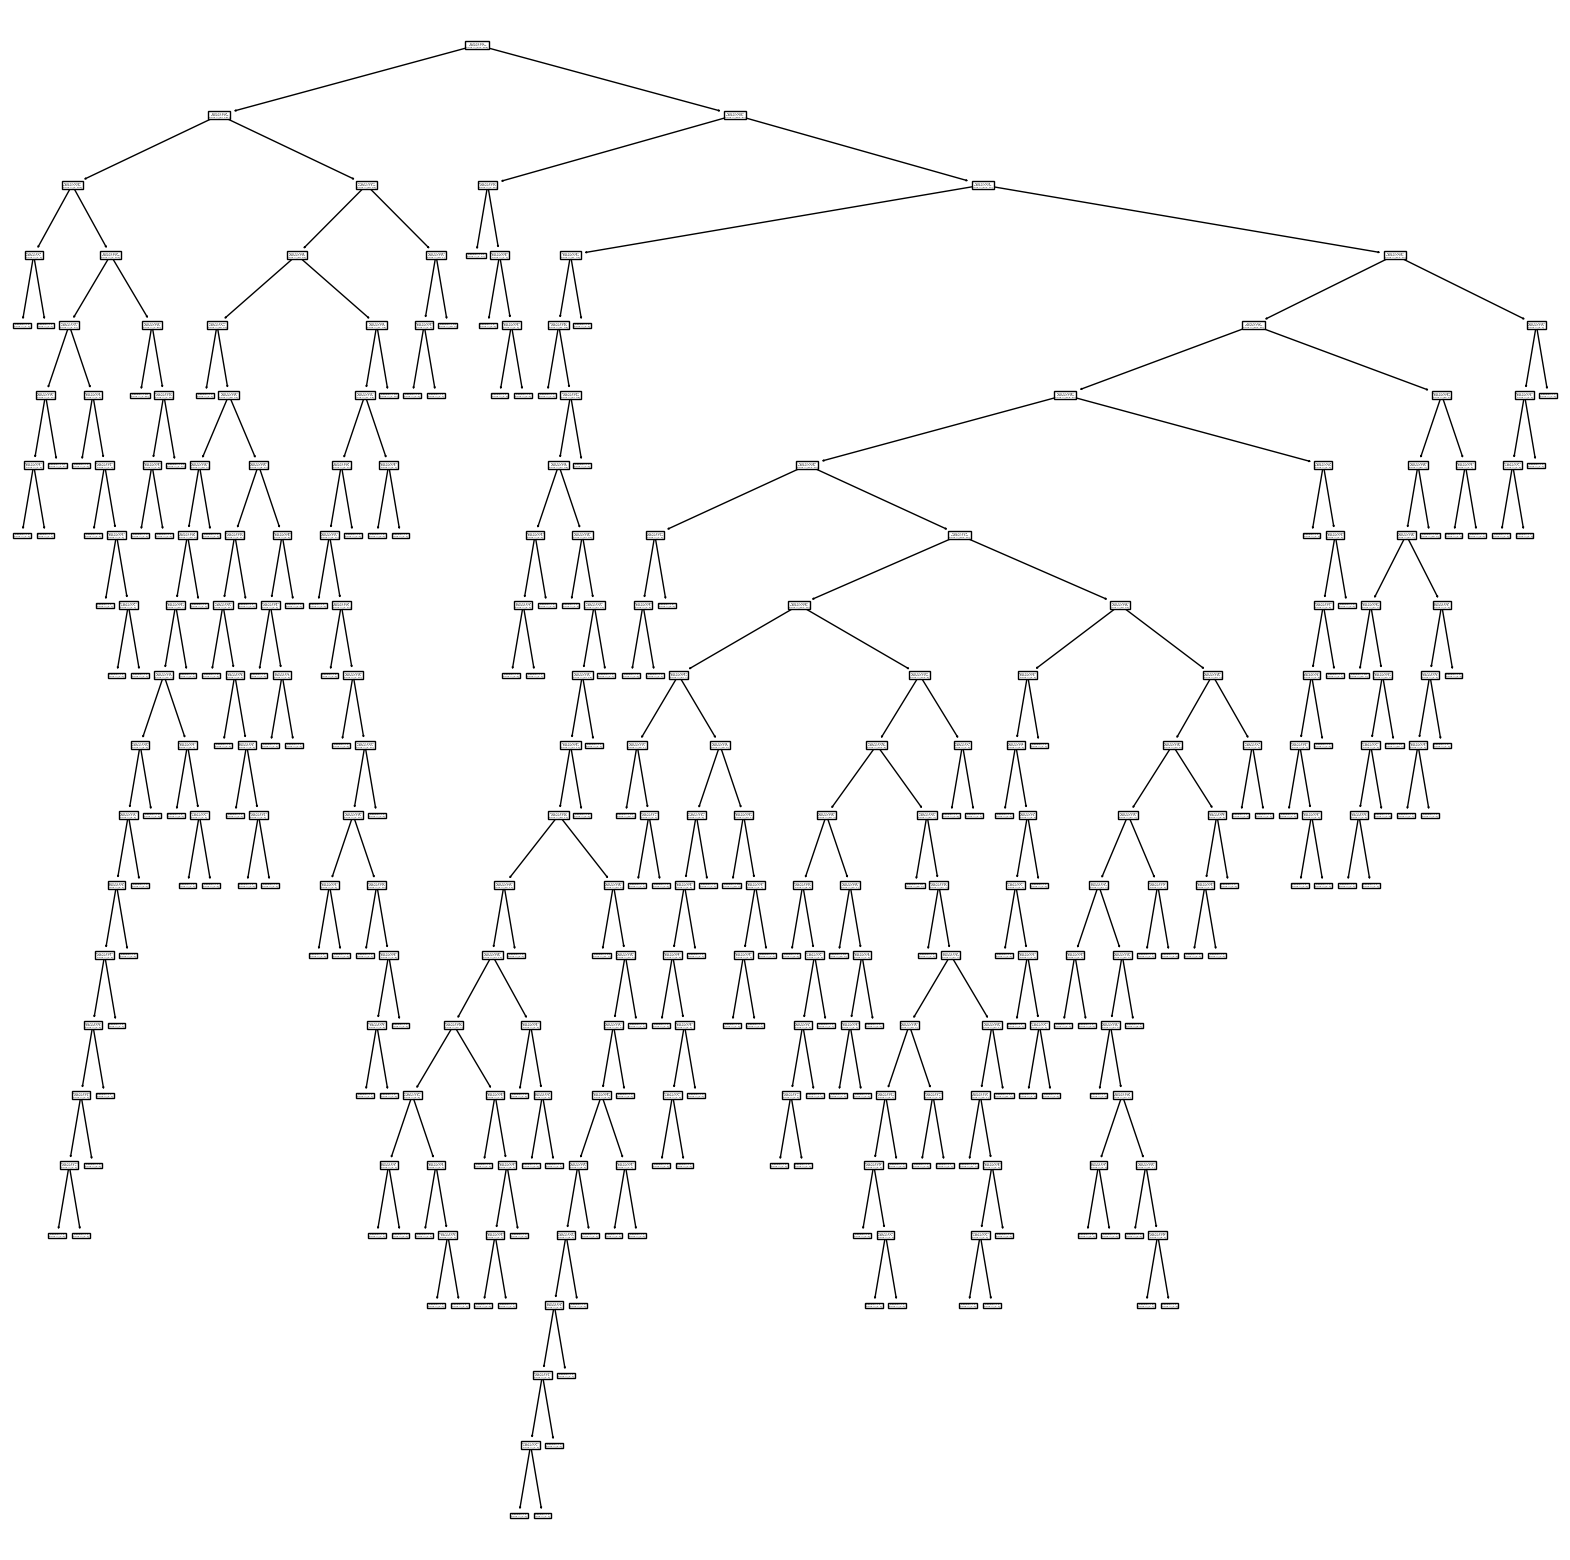

In [58]:
plt.figure(figsize=(20, 20))
print('\n\033[1mInterpreting the output of Decision Tree:\n\033[0m')
tree.plot_tree(dt)
plt.show()

### 3. RandomForestClassifier

In [59]:
# Initialize RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1000)

In [60]:
# Train the model
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [61]:
# Training Accuracy Score
train_accuracy_rf = accuracy_score(y_train, rf.predict(X_train))

# Cross Validation Score
cross_val_scores = cross_val_score(rf, X, Y, cv=5)
cross_val_score_avg_rf = np.average(cross_val_scores)

# Testing Accuracy Score
test_accuracy_rf = accuracy_score(y_test, rf.predict(X_test))

# Precision Score
precision_rf = precision_score(y_test, rf.predict(X_test), average='weighted')

# Recall Score
recall_rf = recall_score(y_test, rf.predict(X_test), average='weighted')

# F1-Score Score
f1_rf = f1_score(y_test, rf.predict(X_test), average='weighted')

# Confusion Matrix
cm_rf = confusion_matrix(y_test, rf.predict(X_test))

# Classification Report
cr_rf = classification_report(y_test, rf.predict(X_test))

In [62]:
# Display the metrics for RandomForestClassifier
print("Metrics for RandomForestClassifier:")
print(f"Training Accuracy Score: {train_accuracy_rf}")
print(f"Cross Validation Score: {cross_val_score_avg_rf}")
print(f"Testing Accuracy Score: {test_accuracy_rf}")
print(f"Precision Score: {precision_rf}")
print(f"Recall Score: {recall_rf}")
print(f"F1-Score: {f1_rf}")
print(f"Confusion Matrix:\n{cm_rf}")
print(f"Classification Report:\n{cr_rf}")

Metrics for RandomForestClassifier:
Training Accuracy Score: 0.9789325842696629
Cross Validation Score: 0.8081036971941498
Testing Accuracy Score: 0.8100558659217877
Precision Score: 0.8091625969233472
Recall Score: 0.8100558659217877
F1-Score: 0.8091929317716401
Confusion Matrix:
[[90 15]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



[[90 15]
 [19 55]]


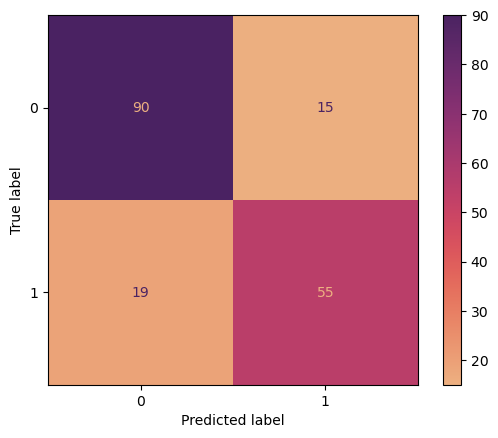

In [63]:
ConfusionMatrixDisplay.from_predictions(y_test, rf.predict(X_test),cmap="flare")
print(cm_rf)

#### 4. KNeighborsClassifier

In [64]:
# Initialize KNeighborsClassifier
knn = KNeighborsClassifier(5)

In [65]:
# Train the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [66]:
#Training Accuracy Score
train_accuracy_knn = accuracy_score(y_train, knn.predict(X_train))

# Cross Validation Score
cross_val_scores = cross_val_score(knn, X, Y, cv=5)
cross_val_score_avg_knn = np.average(cross_val_scores)

# Testing Accuracy Score
test_accuracy_knn = accuracy_score(y_test, knn.predict(X_test))

# Precision Score
precision_knn = precision_score(y_test, knn.predict(X_test), average='weighted')

# Recall Score
recall_knn = recall_score(y_test, knn.predict(X_test), average='weighted')

# F1-Score Score
f1_knn = f1_score(y_test, knn.predict(X_test), average='weighted')

# Confusion Matrix
cm_knn = confusion_matrix(y_test, knn.predict(X_test))

# Classification Report
cr_knn = classification_report(y_test, knn.predict(X_test))

In [67]:
# Display the metrics for KNeighborsClassifier
print("Metrics for KNeighborsClassifier:")
print(f"Training Accuracy Score: {train_accuracy_knn}")
print(f"Cross Validation Score: {cross_val_score_avg_knn}")
print(f"Testing Accuracy Score: {test_accuracy_knn}")
print(f"Precision Score: {precision_knn}")
print(f"Recall Score: {recall_knn}")
print(f"F1-Score: {f1_knn}")
print(f"Confusion Matrix:\n{cm_knn}")
print(f"Classification Report:\n{cr_knn}")

Metrics for KNeighborsClassifier:
Training Accuracy Score: 0.8581460674157303
Cross Validation Score: 0.7957629778419433
Testing Accuracy Score: 0.8044692737430168
Precision Score: 0.8036409018980425
Recall Score: 0.8044692737430168
F1-Score: 0.8038235190375541
Confusion Matrix:
[[89 16]
 [19 55]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179



[[89 16]
 [19 55]]


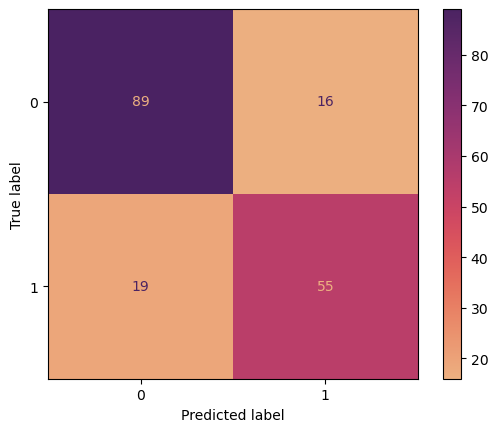

In [68]:
ConfusionMatrixDisplay.from_predictions(y_test, knn.predict(X_test),cmap="flare")
print(cm_knn)

In [69]:
#Let us create first create a table to store the results of various models 

Evaluation_Results = pd.DataFrame(np.zeros((4,6)), columns=['Training Accuracy Score','Cross Validation Score','Testing Accuracy Score', 'Precision','Recall','F1-score'])
Evaluation_Results.index=['Logistic Regression (LR)','Decision Tree Classifier (DT)','Random Forest Classifier (RF)','K Nearest Neighbours (KNN)']

In [70]:
lr_results = [train_accuracy_lr, cross_val_score_avg_lr,test_accuracy_lr,precision_lr,recall_lr,f1_lr]
dt_results = [train_accuracy_dt, cross_val_score_avg_dt,test_accuracy_dt,precision_dt,recall_dt,f1_dt]
rf_results = [train_accuracy_rf, cross_val_score_avg_rf,test_accuracy_rf,precision_rf,recall_rf,f1_rf]
knn_results = [train_accuracy_knn, cross_val_score_avg_knn,test_accuracy_knn,precision_knn,recall_knn,f1_knn]

# Update the DataFrame
Evaluation_Results.loc['Logistic Regression (LR)'] = lr_results
Evaluation_Results.loc['Decision Tree Classifier (DT)'] = dt_results
Evaluation_Results.loc['Random Forest Classifier (RF)'] = rf_results
Evaluation_Results.loc['K Nearest Neighbours (KNN)'] = knn_results


In [71]:
Evaluation_Results

,Training Accuracy Score,Cross Validation Score,Testing Accuracy Score,Precision,Recall,F1-score
Logistic Regression (LR),0.801966,0.783391,0.798883,0.797830,0.798883,0.797427
Decision Tree Classifier (DT),0.978933,0.776700,0.776536,0.775781,0.776536,0.776060
Random Forest Classifier (RF),0.978933,0.808104,0.810056,0.809163,0.810056,0.809193
K Nearest Neighbours (KNN),0.858146,0.795763,0.804469,0.803641,0.804469,0.803824


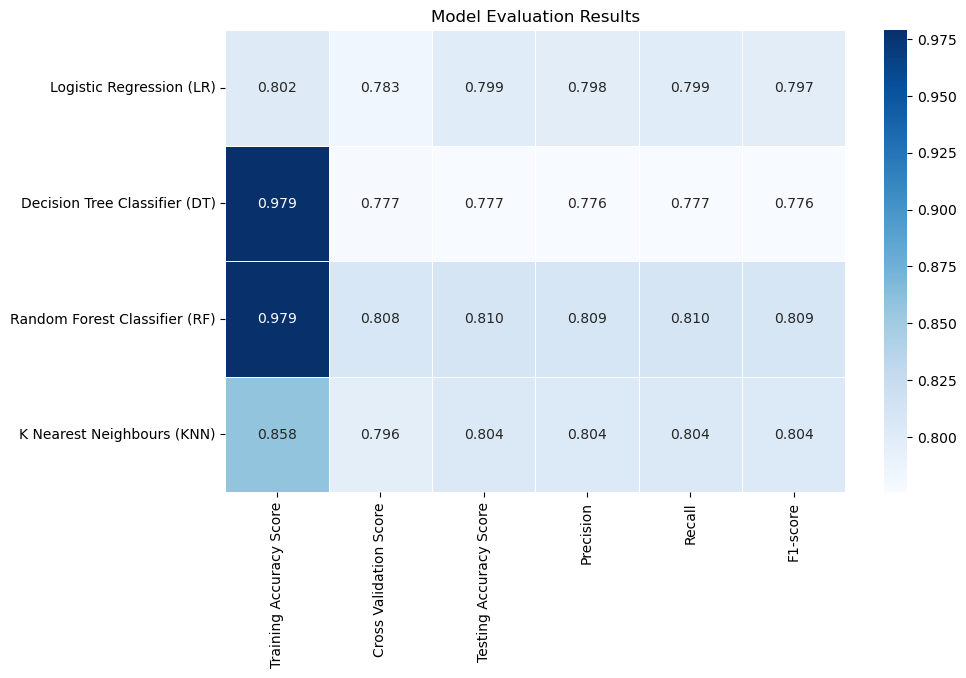

In [72]:
# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(Evaluation_Results, annot=True, cmap='Blues', fmt=".3f", linewidths=.5)
plt.title('Model Evaluation Results')
plt.show()


### 7. Project Outcomes & Conclusions

+ we performed a comprehensive analysis of the Titanic dataset, including data exploration, visualization, data preprocessing, and predictive modeling. We used different machine learning models like  Logistic Regression, Decision Tree Classifier,RandomForestClassifier, and K Nearest Neighbours.

**Data Characteristics:**

+ The dataset contains more male passengers than females.
+ Most passengers are in the age group of 24, with a maximum count at 30.
+ The majority of passengers belong to Pclass 3.
+ Most passengers are traveling without siblings or spouses and parched alone.
+ The majority of passengers embarked from Southampton.

**Survival Rate:**

+ The overall survival rate in the dataset is 38.4% as most of the people do not survived.
+ Majority of males do not survived as women and children are preffered during rescue. 

**Model Performance:**

+ The Random Forest Classifier consistently demonstrates the best performance across various metrics, including testing accuracy, precision, recall, and F1-score.
+ Logistic Regression and K Nearest Neighbours also show competitive performance, while the Decision Tree model, despite high training accuracy, exhibits relatively lower metrics on the testing dataset.


**Model Selection:**

+ Depending on the specific goals and requirements, the Random Forest Classifier may be a suitable choice due to its superior performance. However, considerations such as interpretability, computational cost, and other factors may influence the model selection.

